In [300]:
import pandas as pd
from scipy import stats
import numpy as np
import pingouin as pg
# import cntext as ct
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import semopy
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Read data of LIWC results

In [6]:
data = pd.read_csv('LIWC2015 Results (weibo_concat.csv).csv')

In [447]:
data.shape

(76514, 120)

## Drop ips that are not from mainland China and posts with empty ips

In [7]:
data_drop = data[data['微博发布 ip 属地（2022-04-28及之后发布的微博才有，官媒等不显示 ip 属地）'].notna()].copy()

In [8]:
data_drop['ip'] = data_drop['微博发布 ip 属地（2022-04-28及之后发布的微博才有，官媒等不显示 ip 属地）'].apply(lambda x:x.split(' ')[-1])

In [9]:
province_list = ['北京','上海','重庆', '天津',
                 '广东','江苏','浙江','山东','四川','河南','河北' ,'福建' ,'湖北', '陕西', '湖南', '辽宁', '安徽', '黑龙江', '山西', '江西', '云南','贵州', '广西','内蒙古', '甘肃', '吉林', '新疆', '海南','宁夏', '西藏', '青海']

In [10]:
data_drop2 = data_drop[data_drop['ip'].isin(province_list)].copy()

In [11]:
data_drop2['publish_time'] = pd.to_datetime(data_drop2['publish_time'])

In [12]:
data_drop2.shape

(45308, 121)

## Calculate emotional well-being, analytical thinking and somatosensory indexes

In [210]:
data_drop2['emotional_well_being'] = data_drop2['posemo'] - data_drop2['negemo']

In [211]:
data_drop2['analytical_thinking'] = data_drop2['prep'] - data_drop2['pronoun'] - data_drop2['auxverb'] - data_drop2['negate'] - data_drop2['conj'] - data_drop2['adverb']

In [212]:
data_drop2['somatosensory'] = data_drop2['body'] + data_drop2['percept']

## only keep individuals' posts

In [213]:
data_drop3 = data_drop2[data_drop2['verify_typ'] == '没有认证'].copy()

## detecting pro-environmental tendencies

In [19]:
pro_env_keywords = pd.read_excel('PEBs_keywords.xlsx')

In [20]:
pro_env_keywords = pro_env_keywords.dropna(subset=['Translation'])

In [21]:
pro_env_keywords

,Behaviors https://doi.org/10.1016/j.jbusres.2013.03.007,Translation,category
1,1. Recycle paper and paper products?,回收纸张,recycling
2,2. Recycle cardboard?,回收纸板,recycling
3,3. Recycle plastic bottles and containers?,回收塑料瓶,recycling
4,4. Recycle aluminum/tin cans and containers?,回收金属,recycling
5,5. Recycle used glass bottles and containers?,回收玻璃瓶,recycling
...,...,...,...
68,NaN,植物饮食,diet
69,NaN,少吃肉,diet
70,NaN,自然保护,activism
71,NaN,环境保护,activism


In [22]:
pro_key_str = ('|').join(pro_env_keywords['Translation'].tolist())
pro_key_str

'回收纸张|回收纸板|回收塑料瓶|回收金属|回收玻璃瓶|回收电池|可循环利用|垃圾分类|可回收包装|随手关灯|自然晾干|买环境安全|冬天调低暖气|用节能灯泡|买有机食品|可降解包装|买环保产品|夏天少用空调|避免使用气溶胶容器|不买用动物进行实验的产品|不买来自濒危动物物种的产品|不买对环境造成危害的产品|不买包装对环境造成危害的产品|不买用农药的产品|捐钱|购买能源效率家用电器|抵制破坏环境|倡导环境保护|签署环境保护请愿书|参加志愿活动|随手关水龙头|节约用电|节约用水|使用可降解|重复使用|节约用水|使用可降解|不使用泡沫塑料包装|节约用水|乘坐|公交车|公共交通|地铁|火车|骑自行车|步行|拼车|减少飞机旅行|素食|绿色消费|可持续性消费|减少浪费|减少塑料|购买区域性产品|使用可再生|减少排放|使用清洁能源|绿色生活|低碳生活|低碳饮食|植物饮食|少吃肉|自然保护|环境保护|环保'

In [236]:
data_drop3['pro_environment'] = data_drop3['content'].str.contains(pro_key_str)

In [237]:
data_drop3['pro_environment'].value_counts()

False    20429
True      6092
Name: pro_environment, dtype: int64

## sample for human validation

In [980]:
data_drop3[data_drop3['pro_environment'] == True].sample(n=200,random_state=54321).to_excel('pro_environmental_validation.xlsx')

In [490]:
data_drop3.to_csv('posts_indicators_pebs.csv',index=False)

## adding weather data

In [25]:
weather_data = pd.read_csv('weather_data_agg.csv')

In [26]:
weather_data

,Unnamed: 0,DATE,province,TMAX_Celsius,TMIN_Celsius,TAVE_Celsius,PRCP_mm
0,0,2002-01-01,上海市,11.111111,3.888889,7.500000,0.000000
1,1,2002-01-01,云南省,16.728395,3.395062,10.061728,0.000000
2,2,2002-01-01,内蒙古自治区 ᠦᠪᠦᠷ ᠮᠣᠩᠭᠤᠯ ᠤᠨ ᠥᠪᠡᠷᠲᠡᠭᠡᠨ ᠵᠠᠰᠠᠬᠣ ᠣᠷᠣᠨ,-9.377778,-20.688889,-15.033333,0.010583
3,3,2002-01-01,北京市,5.555556,-5.555556,0.000000,0.000000
4,4,2002-01-01,吉林省,-13.055556,-19.583333,-16.319444,0.000000
...,...,...,...,...,...,...,...
216471,216471,2023-07-31,辽宁省,31.759259,22.037037,26.898148,0.000000
216472,216472,2023-07-31,重庆市,31.666667,22.777778,27.222222,8.382000
216473,216473,2023-07-31,陕西省,29.629630,20.925926,25.277778,3.302000
216474,216474,2023-07-31,青海省,23.750000,8.564815,16.157407,1.312333


In [27]:
weather_data['Year'] = weather_data['DATE'].apply(lambda x:x.split('-')[0])

In [29]:
weather_data['day'] = weather_data['DATE'].apply(lambda x:x[-5:])

## calculating percentile and extreme weather events for each week, compared with its 20-year historical records

In [31]:
def custom_agg(x):
    return [x.quantile(0.9),x.quantile(0.1), x.mean()]

In [32]:
data_2022_pre20_mean = weather_data[weather_data['Year']<'2022'].groupby(([pd.Grouper(key='day'),pd.Grouper(key='province')]))['TAVE_Celsius','PRCP_mm'].agg(custom_agg).reset_index()

/var/folders/2x/dmnl4f2967d8j9l038tv_txw0000gn/T/ipykernel_69552/916057008.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2022_pre20_mean = weather_data[weather_data['Year']<'2022'].groupby(([pd.Grouper(key='day'),pd.Grouper(key='province')]))['TAVE_Celsius','PRCP_mm'].agg(custom_agg).reset_index()


In [37]:
data_2022_pre20_mean['TAVE_Celsius_pre20_week_mean'] = data_2022_pre20_mean['TAVE_Celsius'].apply(lambda x: x[2])

In [35]:
data_2022_pre20_mean['TAVE_Celsius_pre20_week_90quantile'] = data_2022_pre20_mean['TAVE_Celsius'].apply(lambda x: x[0])

In [36]:
data_2022_pre20_mean['TAVE_Celsius_pre20_week_10quantile'] = data_2022_pre20_mean['TAVE_Celsius'].apply(lambda x: x[1])
data_2022_pre20_mean['PRCP_pre20_week_mean'] = data_2022_pre20_mean['PRCP_mm'].apply(lambda x: x[2])
data_2022_pre20_mean['PRCP_pre20_week_90quantile'] = data_2022_pre20_mean['PRCP_mm'].apply(lambda x: x[0])
data_2022_pre20_mean['PRCP_pre20_week_10quantile'] = data_2022_pre20_mean['PRCP_mm'].apply(lambda x: x[1])

In [38]:
data_2023_pre20_mean = weather_data[(weather_data['Year']<'2023') & (weather_data['Year']>='2003')].groupby(([pd.Grouper(key='day'),pd.Grouper(key='province')]))['TAVE_Celsius','PRCP_mm'].agg(custom_agg).reset_index()

/var/folders/2x/dmnl4f2967d8j9l038tv_txw0000gn/T/ipykernel_69552/2657100252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2023_pre20_mean = weather_data[(weather_data['Year']<'2023') & (weather_data['Year']>='2003')].groupby(([pd.Grouper(key='day'),pd.Grouper(key='province')]))['TAVE_Celsius','PRCP_mm'].agg(custom_agg).reset_index()


In [39]:
data_2023_pre20_mean['TAVE_Celsius_pre20_week_mean'] = data_2023_pre20_mean['TAVE_Celsius'].apply(lambda x: x[2])

In [40]:
data_2023_pre20_mean['TAVE_Celsius_pre20_week_90quantile'] = data_2023_pre20_mean['TAVE_Celsius'].apply(lambda x: x[0])

In [41]:
data_2023_pre20_mean['TAVE_Celsius_pre20_week_10quantile'] = data_2023_pre20_mean['TAVE_Celsius'].apply(lambda x: x[1])

In [42]:
data_2023_pre20_mean['PRCP_pre20_week_mean'] = data_2023_pre20_mean['PRCP_mm'].apply(lambda x: x[2])

In [43]:
data_2023_pre20_mean['PRCP_pre20_week_90quantile'] = data_2023_pre20_mean['PRCP_mm'].apply(lambda x: x[0])

In [44]:
data_2023_pre20_mean['PRCP_pre20_week_10quantile'] = data_2023_pre20_mean['PRCP_mm'].apply(lambda x: x[1])

In [46]:
data_2023_pre20_mean = data_2023_pre20_mean.drop(columns=['TAVE_Celsius','PRCP_mm'])

In [47]:
data_2022_pre20_mean = data_2022_pre20_mean.drop(columns=['TAVE_Celsius','PRCP_mm'])

In [48]:
data_2022_join = weather_data[weather_data['Year']=='2022'].join(data_2022_pre20_mean.set_index(['day','province']), on=['day','province'],how='left')

In [49]:
data_2023_join = weather_data[weather_data['Year']=='2023'].join(data_2023_pre20_mean.set_index(['day','province']), on=['day','province'],how='left')

In [50]:
data_2023_join

,Unnamed: 0,DATE,province,TMAX_Celsius,TMIN_Celsius,TAVE_Celsius,PRCP_mm,Year,day,TAVE_Celsius_pre20_week_mean,TAVE_Celsius_pre20_week_90quantile,TAVE_Celsius_pre20_week_10quantile,PRCP_pre20_week_mean,PRCP_pre20_week_90quantile,PRCP_pre20_week_10quantile
210171,210171,2023-01-01,上海市,10.000000,-1.111111,4.444444,0.000000,2023,01-01,3.769841,8.472222,-0.194444,0.582083,0.228600,0.000000
210172,210172,2023-01-01,云南省,14.652778,4.722222,9.687500,1.111250,2023,01-01,11.471590,14.777778,9.257937,0.617569,0.762000,0.000000
210173,210173,2023-01-01,内蒙古自治区 ᠦᠪᠦᠷ ᠮᠣᠩᠭᠤᠯ ᠤᠨ ᠥᠪᠡᠷᠲᠡᠭᠡᠨ ᠵᠠᠰᠠᠬᠣ ᠣᠷᠣᠨ,-7.222222,-21.736111,-14.479167,0.000000,2023,01-01,-14.683112,-8.370370,-19.787273,0.302268,0.635000,0.000000
210174,210174,2023-01-01,吉林省,-3.518519,-19.814815,-11.666667,0.000000,2023,01-01,-14.417438,-7.243056,-19.152778,0.051405,0.203200,0.000000
210175,210175,2023-01-01,四川省,8.842593,-3.101852,2.870370,0.571500,2023,01-01,3.318434,4.974747,0.935606,0.694878,1.194570,0.005080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216471,216471,2023-07-31,辽宁省,31.759259,22.037037,26.898148,0.000000,2023,07-31,25.531481,27.958333,23.440476,7.288092,17.547771,0.263676
216472,216472,2023-07-31,重庆市,31.666667,22.777778,27.222222,8.382000,2023,07-31,28.768519,30.833333,27.055556,3.048000,8.229600,0.000000
216473,216473,2023-07-31,陕西省,29.629630,20.925926,25.277778,3.302000,2023,07-31,25.722222,28.166667,23.291667,3.756378,7.950200,0.000000
216474,216474,2023-07-31,青海省,23.750000,8.564815,16.157407,1.312333,2023,07-31,13.881400,16.060185,11.472222,2.027767,4.406900,0.059267


In [51]:
weather_data_join = data_2022_join.append(data_2023_join)

In [52]:
weather_data_join

,Unnamed: 0,DATE,province,TMAX_Celsius,TMIN_Celsius,TAVE_Celsius,PRCP_mm,Year,day,TAVE_Celsius_pre20_week_mean,TAVE_Celsius_pre20_week_90quantile,TAVE_Celsius_pre20_week_10quantile,PRCP_pre20_week_mean,PRCP_pre20_week_90quantile,PRCP_pre20_week_10quantile
199068,199068,2022-01-01,云南省,17.777778,4.652778,11.215278,0.000000,2022,01-01,11.410877,14.777778,9.257937,0.617569,0.762000,0.000000
199069,199069,2022-01-01,内蒙古自治区 ᠦᠪᠦᠷ ᠮᠣᠩᠭᠤᠯ ᠤᠨ ᠥᠪᠡᠷᠲᠡᠭᠡᠨ ᠵᠠᠰᠠᠬᠣ ᠣᠷᠣᠨ,-5.439815,-21.736111,-13.587963,0.190500,2022,01-01,-14.759184,-8.370370,-19.787273,0.291684,0.635000,0.000000
199070,199070,2022-01-01,吉林省,-7.962963,-22.037037,-15.000000,0.084667,2022,01-01,-14.490741,-7.243056,-19.152778,0.045357,0.196850,0.000000
199071,199071,2022-01-01,四川省,9.861111,-4.583333,2.638889,5.559778,2022,01-01,3.250147,4.974747,0.935606,0.267203,0.955579,0.000000
199072,199072,2022-01-01,天津市,6.111111,-6.666667,-0.277778,0.000000,2022,01-01,-3.006536,0.388889,-5.555556,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216471,216471,2023-07-31,辽宁省,31.759259,22.037037,26.898148,0.000000,2023,07-31,25.531481,27.958333,23.440476,7.288092,17.547771,0.263676
216472,216472,2023-07-31,重庆市,31.666667,22.777778,27.222222,8.382000,2023,07-31,28.768519,30.833333,27.055556,3.048000,8.229600,0.000000
216473,216473,2023-07-31,陕西省,29.629630,20.925926,25.277778,3.302000,2023,07-31,25.722222,28.166667,23.291667,3.756378,7.950200,0.000000
216474,216474,2023-07-31,青海省,23.750000,8.564815,16.157407,1.312333,2023,07-31,13.881400,16.060185,11.472222,2.027767,4.406900,0.059267


In [53]:
weather_data_join['extreme_hot'] = weather_data_join['TAVE_Celsius'] > weather_data_join['TAVE_Celsius_pre20_week_90quantile']

In [54]:
weather_data_join['extreme_cold'] = weather_data_join['TAVE_Celsius'] < weather_data_join['TAVE_Celsius_pre20_week_10quantile']

In [55]:
weather_data_join['extreme_dry'] = weather_data_join['PRCP_mm'] < weather_data_join['PRCP_pre20_week_10quantile']

In [56]:
weather_data_join['extreme_wet'] = weather_data_join['PRCP_mm'] > weather_data_join['PRCP_pre20_week_90quantile']

In [57]:
weather_data_join['TAVE_DIFF'] = weather_data_join['TAVE_Celsius'] - weather_data_join['TAVE_Celsius_pre20_week_mean']

In [58]:
weather_data_join['PRCP_DIFF'] = weather_data_join['PRCP_mm'] - weather_data_join['PRCP_pre20_week_mean']

In [62]:
weather_data_join['province'] = weather_data_join['province'].apply(lambda x: x.replace('省',''))

In [63]:
weather_data_join['province'] = weather_data_join['province'].apply(lambda x: x.replace('市',''))

## replace tag names

In [65]:
province_tag = {
    '内蒙古自治区 ᠦᠪᠦᠷ ᠮᠣᠩᠭᠤᠯ ᠤᠨ ᠥᠪᠡᠷᠲᠡᠭᠡᠨ ᠵᠠᠰᠠᠬᠣ ᠣᠷᠣᠨ':'内蒙古',
    '广西壮族自治区':'广西',
    '宁夏回族自治区':'宁夏',
    '新疆维吾尔自治区 شىنجاڭ ئۇيغۇر ئاپتونوم رايونی':'新疆',
     '西藏自治区 བོད་རང་སྐྱོང་ལྗོངས།':'西藏',
    '澳門 Macau':'中国澳门',

}

In [66]:
weather_data_join['province'] = weather_data_join['province'].replace(province_tag)

In [68]:
remove_list = [ '中国台湾','中国澳门','中国香港']

In [69]:
weather_data_drop = weather_data_join[~weather_data_join['province'].isin(remove_list)].copy()

In [71]:
weather_data_drop = weather_data_drop.rename(columns={'province':'ip'})

In [216]:
data_drop3['Year'] = data_drop3['publish_time'].dt.year

In [217]:
data_drop3['publish_time'].astype(str)[5:9]

154    2022-05-01 07:04:00
156    2022-05-01 07:15:00
157    2022-05-01 07:38:00
158    2022-05-01 07:43:00
Name: publish_time, dtype: object

In [218]:
data_drop3['day'] = data_drop3['publish_time'].apply(lambda x:str(x)[5:10])

In [220]:
data_drop3['Year'] = data_drop3['Year'].astype(str)

## join weather data with weibo data

In [238]:
emo_weather_join = data_drop3.set_index(['Year','day','ip']).join(weather_data_drop.set_index(['Year','day','ip']), on=['Year','day','ip'], how='left').reset_index()

In [239]:
emo_weather_join2 = emo_weather_join[emo_weather_join['TAVE_Celsius'].notna()].copy()

In [241]:
emo_weather_join2['thinking_style'] = emo_weather_join2['analytical_thinking'] - emo_weather_join2['cogproc']

## calculating correlations between measures

In [243]:
emo_corr = emo_weather_join2[(emo_weather_join2['emotional_well_being']>-40) & (emo_weather_join2['emotional_well_being']<40)].copy()

In [244]:
measures = emo_corr[['extreme_hot', 'extreme_cold', 'extreme_dry', 'extreme_wet',
       'TAVE_DIFF', 'PRCP_DIFF', 'emotional_well_being','anger','anx', 'sad','affiliation',
       'thinking_style','somatosensory','pro_environment']].copy()

In [544]:
measures.columns = ['Extreme hot days (a)', 'Extreme cold days (a)', 'Extreme dry days (a)', 'Extreme wet days (a)',
       'Temperature change in Degree Celsius (b)', 'Precipitation change in Millimeter (b)', 'Emotional well-being (b)',
       'Anger (b)','Anxiety (b)', 'Sadness (b)','Social affiliations (b)','Analytical-Intuitive thinking style (b)','Somatosensory experiences (b)','Pro-environment tendency (a)']

In [545]:
measures = measures.replace({True:1, False:0})

In [546]:
rho = measures.corr()
rho

,Extreme hot days (a),Extreme cold days (a),Extreme dry days (a),Extreme wet days (a),Temperature change in Degree Celsius (b),Precipitation change in Millimeter (b),Emotional well-being (b),Anger (b),Anxiety (b),Sadness (b),Social affiliations (b),Analytical-Intuitive thinking style (b),Somatosensory experiences (b),Pro-environment tendency (a)
Extreme hot days (a),1.000000,-0.198871,0.113672,-0.045471,0.663616,-0.109199,-0.052908,0.028601,0.015915,0.021201,-0.056911,-0.051747,0.017112,-0.039379
Extreme cold days (a),-0.198871,1.000000,-0.040293,0.069299,-0.589269,0.067738,0.023170,-0.008642,-0.015939,-0.008592,0.009637,0.013797,0.003574,0.019493
Extreme dry days (a),0.113672,-0.040293,1.000000,-0.078899,0.073388,-0.153337,-0.008359,0.006535,0.013975,0.012755,-0.006948,-0.014067,-0.007213,0.000547
Extreme wet days (a),-0.045471,0.069299,-0.078899,1.000000,-0.050623,0.627563,-0.014684,-0.003569,0.005375,-0.001151,-0.006022,-0.017005,-0.004054,-0.007402
Temperature change in Degree Celsius (b),0.663616,-0.589269,0.073388,-0.050623,1.000000,-0.096918,-0.049378,0.018908,0.018190,0.019357,-0.047358,-0.048147,0.003704,-0.040489
Precipitation change in Millimeter (b),-0.109199,0.067738,-0.153337,0.627563,-0.096918,1.000000,0.002318,-0.008337,-0.004138,-0.004402,0.008750,-0.001613,-0.005467,0.009547
Emotional well-being (b),-0.052908,0.023170,-0.008359,-0.014684,-0.049378,0.002318,1.000000,-0.387599,-0.331621,-0.227817,0.626920,0.259328,0.181346,0.612935
Anger (b),0.028601,-0.008642,0.006535,-0.003569,0.018908,-0.008337,-0.387599,1.000000,0.241274,0.141661,-0.133945,-0.053992,-0.042973,-0.119153
Anxiety (b),0.015915,-0.015939,0.013975,0.005375,0.018190,-0.004138,-0.331621,0.241274,1.000000,0.206478,-0.133544,-0.085028,-0.013281,-0.114650
Sadness (b),0.021201,-0.008592,0.012755,-0.001151,0.019357,-0.004402,-0.227817,0.141661,0.206478,1.000000,-0.094321,-0.053769,0.001057,-0.079987


In [538]:
# rho['extreme_hot'] = rho['extreme_hot'].apply(lambda x: f"{x:.2f}")

In [547]:
for colu in rho.columns:
    rho[colu] = rho[colu].apply(lambda x: f"{x:.2f}")

In [548]:
pval = measures.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho2 = rho + p

## testing alternative methods for binary correlations
## results remain robust as pearson correlation

In [465]:
from sklearn.metrics import matthews_corrcoef

In [467]:
matthews_corrcoef(measures['Extreme hot (binary)'], measures['Extreme cold (binary)']) 

-0.19887131449345258

In [470]:
matthews_corrcoef(measures['Extreme hot (binary)'], measures['Extreme dry (binary)']) 

0.11367178423950755

In [473]:
matthews_corrcoef(measures['Extreme hot (binary)'], measures['Extreme wet (binary)']) 

-0.04547136854714805

In [475]:
matthews_corrcoef(measures['Extreme cold (binary)'], measures['Pro-environment (binary)']) 

0.01949280484378225

## plot

In [549]:
mask = np.triu(np.ones_like(rho, dtype=bool))
# np.fill_diagonal(mask, False)

In [550]:
annot = [[val for val in row] for row in rho2.to_numpy()]

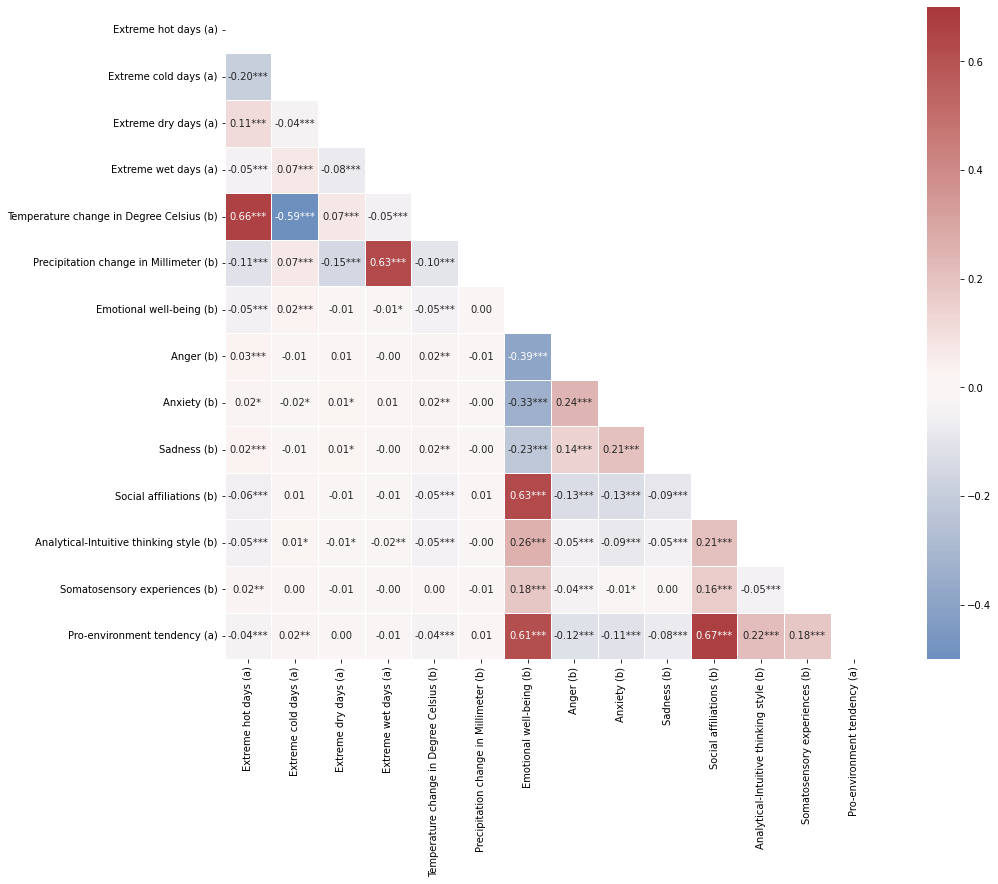

In [551]:
plt.figure(figsize=(18,12))
variable_heatmap = sns.heatmap(measures.corr(),center=0, mask = mask,square=True,cmap='vlag',linewidths=0.5, vmin=-0.5, vmax=0.7,fmt="",
            annot = annot, annot_kws={ "size":10})
fig = variable_heatmap.get_figure()
fig.savefig("output/variable_association.png",dpi=400,bbox_inches='tight') 

## read regional vulnerability data

In [267]:
province_indicator = pd.read_excel('China Yearbook 2022.xlsx',sheet_name='Sheet2')

In [268]:
province_indicator.columns

Index(['ip', '人口数', 'post', '0-14岁', '15-64岁', '65以上', 'population',
       '0-14_percentage', '15-64_percentage', '65-above_percentage',
       'Vulnerable group', 'population_density', 'Eco_cat', 'Coastal_regions',
       'age_0_14', 'age_65_above', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary'],
      dtype='object')

In [269]:
emo_weather_join2.shape

(24161, 149)

In [270]:
emo_weather_join3 = emo_weather_join2[['ip','publish_time','extreme_hot', 'extreme_cold', 'extreme_dry', 'extreme_wet','TAVE_DIFF',
                    'emotional_well_being', 'anger','anx', 'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment']].join(province_indicator[['ip','population_density','population_density_binary',
       'Exposure_index_score','Sensitivity_index_score', 'Adaptability_index_score','Vulnerability_index_score', 'Ranking', 'Ranking_binary',
       'Exposure_index_score_binary', 'Sensitivity_index_score_binary','Adaptability_index_score_binary']].set_index('ip'),
                                on='ip',how='left')

In [271]:
emo_weather_join3 = emo_weather_join3.replace({True:1, False:0})

In [278]:
emo_weather_join3['publish_time'] = emo_weather_join3['publish_time'].dt.date

In [280]:
emo_weather_join4 = emo_weather_join3[(emo_weather_join3['emotional_well_being']>-40) & (emo_weather_join3['emotional_well_being']<40)].copy()

In [1065]:
#emo_weather_join4.to_csv('measure_for_mediation.csv',index=False)

## predicting pro-environmental tendencies


## model 1 crude model

In [282]:
logistic_model = sm.GLM(emo_weather_join4['pro_environment'], sm.add_constant(emo_weather_join4['extreme_hot']),
                        family=sm.families.Binomial())

In [283]:
results = logistic_model.fit()

In [284]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        pro_environment   No. Observations:                24156
Model:                            GLM   Df Residuals:                    24154
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13172.
Date:                Thu, 04 Jan 2024   Deviance:                       26345.
Time:                        12:07:05   Pearson chi2:                 2.42e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001581
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1233      0.017    -65.013      

In [285]:
params = results.params
conf = results.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
np.exp(conf)

,5%,95%,Odds Ratio
const,0.314373,0.336403,0.325201
extreme_hot,0.747202,0.860783,0.801984


## model 2

In [286]:
emo_weather_join4['pro_environment'].value_counts()

0    18462
1     5694
Name: pro_environment, dtype: int64

In [501]:
emo_weather_join4.columns

Index(['ip', 'publish_time', 'extreme_hot', 'extreme_cold', 'extreme_dry',
       'extreme_wet', 'TAVE_DIFF', 'emotional_well_being', 'anger', 'anx',
       'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment', 'population_density', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary',
       'media_emo_tone', 'month', 'season', 'TAVE_DIFF_cat'],
      dtype='object')

In [512]:
exog = sm.add_constant(emo_weather_join4[['extreme_hot','emotional_well_being']])

In [513]:
logistic_model1 = sm.GLM(emo_weather_join4['pro_environment'], exog,
                        family=sm.families.Binomial())

In [514]:
results1 = logistic_model1.fit()

In [515]:
print(results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        pro_environment   No. Observations:                24156
Model:                            GLM   Df Residuals:                    24153
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7882.9
Date:                Thu, 18 Jan 2024   Deviance:                       15766.
Time:                        17:40:02   Pearson chi2:                 2.91e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3557
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4155 

In [516]:
params = results1.params
conf = results1.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
np.exp(conf)

,5%,95%,Odds Ratio
const,0.084017,0.094969,0.089326
extreme_hot,0.821724,0.994269,0.903889
emotional_well_being,1.403428,1.427343,1.415335


## model 3

In [ ]:
emo_weather_join4.columns

Index(['ip', 'publish_time', 'extreme_hot', 'extreme_cold', 'extreme_dry',
       'extreme_wet', 'TAVE_DIFF', 'emotional_well_being', 'anger', 'anx',
       'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment', 'population_density', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary',
       'media_emo_tone', 'month', 'season', 'TAVE_DIFF_cat'],
      dtype='object')

In [517]:
exog = sm.add_constant(emo_weather_join4[['extreme_hot','emotional_well_being','affiliation', 'thinking_style', 'somatosensory']])

In [518]:
logistic_model1 = sm.GLM(emo_weather_join4['pro_environment'], exog,
                        family=sm.families.Binomial())

In [519]:
results1 = logistic_model1.fit()

In [520]:
print(results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        pro_environment   No. Observations:                24156
Model:                            GLM   Df Residuals:                    24150
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6761.0
Date:                Thu, 18 Jan 2024   Deviance:                       13522.
Time:                        17:48:23   Pearson chi2:                 9.03e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4128
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6738 

In [521]:
params = results1.params
conf = results1.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
np.exp(conf)

,5%,95%,Odds Ratio
const,0.061115,0.077883,0.068992
extreme_hot,0.921845,1.137572,1.024043
emotional_well_being,1.210933,1.235363,1.223087
affiliation,1.409215,1.455626,1.432233
thinking_style,1.014828,1.021885,1.018350
somatosensory,1.024606,1.050625,1.037534


## model 4

In [197]:
emo_weather_join4.columns

Index(['ip', 'publish_time', 'extreme_hot', 'extreme_cold', 'extreme_dry',
       'extreme_wet', 'TAVE_DIFF', 'emotional_well-being', 'anger', 'anx',
       'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment', 'population_density', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary',
       'media_emo_tone'],
      dtype='object')

In [440]:
emo_weather_join4.shape

(24156, 30)

In [522]:
exog = sm.add_constant(emo_weather_join4[['extreme_hot','emotional_well_being','affiliation', 'thinking_style', 'somatosensory',
                                          'population_density_binary',
       'Exposure_index_score_binary','Sensitivity_index_score_binary','Adaptability_index_score_binary']])

In [523]:
logistic_model2 = sm.GLM(emo_weather_join4['pro_environment'], exog,
                        family=sm.families.Binomial())

In [524]:
results2 = logistic_model2.fit()

In [525]:
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        pro_environment   No. Observations:                24156
Model:                            GLM   Df Residuals:                    24146
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6737.7
Date:                Thu, 18 Jan 2024   Deviance:                       13475.
Time:                        17:51:36   Pearson chi2:                 1.12e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [526]:
params = results2.params
conf = results2.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
np.exp(conf)

,5%,95%,Odds Ratio
const,0.058391,0.082279,0.069313
extreme_hot,0.908328,1.121967,1.009512
emotional_well_being,1.211673,1.236159,1.223854
affiliation,1.409945,1.456484,1.433026
thinking_style,1.015242,1.022318,1.018774
somatosensory,1.024583,1.050689,1.037554
population_density_binary,0.864382,1.045351,0.950570
Exposure_index_score_binary,0.905807,1.105251,1.000572
Sensitivity_index_score_binary,0.684550,0.835030,0.756055
Adaptability_index_score_binary,1.129516,1.392743,1.254243


## check collinearity

In [494]:
X = emo_weather_join4[['extreme_hot','emotional_well_being','affiliation', 'thinking_style', 'somatosensory','population_density_binary',
       'Exposure_index_score_binary','Sensitivity_index_score_binary','Adaptability_index_score_binary']]
VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [ ]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

## regional differences

In [296]:
emo_weather_join4.columns

Index(['ip', 'publish_time', 'extreme_hot', 'extreme_cold', 'extreme_dry',
       'extreme_wet', 'TAVE_DIFF', 'emotional_well_being', 'anger', 'anx',
       'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment', 'population_density', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary',
       'media_emo_tone'],
      dtype='object')

## population density

In [297]:
model = smf.glm(formula = "emotional_well_being ~ TAVE_DIFF + population_density_binary + TAVE_DIFF*population_density_binary", 
                data = emo_weather_join4, 
                family = sm.families.Gaussian()) 

In [298]:
result = model.fit()

In [299]:
result.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.769602,0.059175,29.904342,1.727957e-196,1.653621,1.885584
TAVE_DIFF,-0.060576,0.018576,-3.261003,1.110190e-03,-0.096984,-0.024168
population_density_binary,-0.191185,0.078412,-2.438205,1.476038e-02,-0.344870,-0.037500
TAVE_DIFF:population_density_binary,-0.067971,0.025294,-2.687212,7.205117e-03,-0.117546,-0.018395


In [339]:
TAVE_DIFF_mean = emo_weather_join4['TAVE_DIFF'].mean()
TAVE_DIFF_std = emo_weather_join4['TAVE_DIFF'].std()

In [340]:
emo_weather_join4['TAVE_DIFF_cat'] = emo_weather_join4['TAVE_DIFF'].apply(lambda x:'1' if x >TAVE_DIFF_mean + TAVE_DIFF_std
                                                                          else ('0' if x <TAVE_DIFF_mean - TAVE_DIFF_std else 'mean'))

In [396]:
emo_weather_join5 = emo_weather_join4[emo_weather_join4['TAVE_DIFF_cat']!='mean'].copy()

In [397]:
emo_weather_join5['Population density'] = emo_weather_join5['population_density_binary'].replace({1:'high',0:'low'})

In [398]:
emo_weather_join5['extreme_hot_cat'] = emo_weather_join5['extreme_hot'].replace({1:'Extreme_hot=1',0:'Extreme_hot=0'})

In [400]:
emo_weather_join5.columns

Index(['ip', 'publish_time', 'extreme_hot', 'extreme_cold', 'extreme_dry',
       'extreme_wet', 'TAVE_DIFF', 'emotional_well_being', 'anger', 'anx',
       'sad', 'affiliation', 'thinking_style', 'somatosensory',
       'pro_environment', 'population_density', 'population_density_binary',
       'Exposure_index_score', 'Sensitivity_index_score',
       'Adaptability_index_score', 'Vulnerability_index_score', 'Ranking',
       'Ranking_binary', 'Exposure_index_score_binary',
       'Sensitivity_index_score_binary', 'Adaptability_index_score_binary',
       'media_emo_tone', 'month', 'season', 'TAVE_DIFF_cat',
       'Population density', 'extreme_hot_cat'],
      dtype='object')

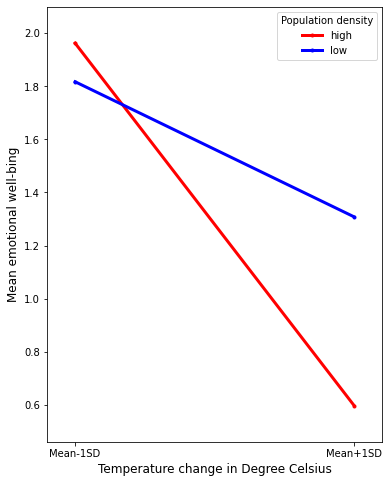

In [416]:
fig, ax = plt.subplots(figsize=(6, 8))
fig = interaction_plot(emo_weather_join5['TAVE_DIFF_cat'],emo_weather_join5['Population density'],emo_weather_join5['emotional_well_being'],
                       ax = ax,colors = ['red','blue'],linewidth=3)
ax.set_xticklabels(['Mean-1SD','Mean+1SD'])
ax.set_xlabel('Temperature change in Degree Celsius',fontsize=12)
ax.set_ylabel('Mean emotional well-bing',fontsize=12)
fig.savefig("output/interaction_plot_pop_den.png",dpi=400,bbox_inches='tight')

In [914]:
# fig, ax = plt.subplots(figsize=(10, 12))
# fig = interaction_plot(emo_weather_join4['population_density'], emo_weather_join4['extreme_hot'], emo_weather_join4['emotional_tone'],
#                      colors=["red", "blue"],
#                      ax=ax)

## check other interaction
* overall vulnerability binary - [x]
* overall vulnerability raw score - [x]
<br />
<br />

* Adaptability_index_score binary - [x] 
* Adaptability_index_score raw score - [y] higher adaptability, lower emotional tone, but no interaction effect. 
<br />
<br />

* Sensitivity_index_score binary - [x]
* Sensitivities raw score - [x]
<br />
<br />

* Exposure_index_score binary - [y]  higher exposure, lower emotional tone, but no interaction effect.
* Exposure_index_score - [y]  higher exposure, lower emotional tone, but no interaction effect.
<br />
<br />

* Population density binary - [y]
* Population density raw score - [x]

## season difference

In [418]:
emo_weather_join4['month'] = emo_weather_join4['publish_time'].apply(lambda x:x.month)

In [419]:
emo_weather_join4['season'] = emo_weather_join4['month'].apply(lambda x: 'spring' if x in [3,4,5] 
                                                               else ('summer' if x in [6,7,8] 
                                                                     else ('autumn' if x in [9,10,11] else 'winter')))

In [421]:
endog = emo_weather_join4[['emotional_well_being']]

In [422]:
exog = sm.add_constant(emo_weather_join4[['extreme_hot']].join(pd.get_dummies(emo_weather_join4['season']).drop(columns='spring')))

In [423]:
exog2 = sm.add_constant(emo_weather_join4[['TAVE_DIFF']].join(pd.get_dummies(emo_weather_join4['season']).drop(columns='spring')))

In [425]:
#exog['spring_extreme_hot'] = exog['extreme_hot'] * exog['spring']
exog['summer_extreme_hot'] = exog['extreme_hot'] * exog['summer']
exog['autumn_extreme_hot'] = exog['extreme_hot'] * exog['autumn']
exog['winter_extreme_hot'] = exog['extreme_hot'] * exog['winter']

In [426]:
exog2['summer_TAVE'] = exog2['TAVE_DIFF'] * exog2['summer']
exog2['autumn_TAVE'] = exog2['TAVE_DIFF'] * exog2['autumn']
exog2['winter_TAVE'] = exog2['TAVE_DIFF'] * exog2['winter']

In [427]:
model = sm.GLM(endog, exog,
                        family=sm.families.Gaussian())

In [428]:
result = model.fit()

In [429]:
print(result.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     emotional_well_being   No. Observations:                24156
Model:                              GLM   Df Residuals:                    24148
Model Family:                  Gaussian   Df Model:                            7
Link Function:                 identity   Scale:                          33.788
Method:                            IRLS   Log-Likelihood:                -76788.
Date:                  Thu, 04 Jan 2024   Deviance:                   8.1590e+05
Time:                          15:56:42   Pearson chi2:                 8.16e+05
No. Iterations:                       3   Pseudo R-squ. (CS):           0.007762
Covariance Type:              nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [430]:
result.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.404584,0.084950,28.305895,2.924209e-176,2.238085,2.571082
extreme_hot,-0.581116,0.191841,-3.029160,2.452351e-03,-0.957117,-0.205115
autumn,-1.152027,0.130045,-8.858695,8.095670e-19,-1.406910,-0.897144
summer,-0.865826,0.110760,-7.817157,5.402963e-15,-1.082911,-0.648741
winter,-0.569857,0.132919,-4.287267,1.808851e-05,-0.830373,-0.309342
summer_extreme_hot,-0.134779,0.227230,-0.593141,5.530870e-01,-0.580141,0.310583
autumn_extreme_hot,0.289128,0.280276,1.031586,3.022663e-01,-0.260202,0.838459
winter_extreme_hot,-0.230894,0.358433,-0.644177,5.194606e-01,-0.933409,0.471621


In [431]:
model2 = sm.GLM(endog, exog2,
                        family=sm.families.Gaussian())

In [432]:
result2 = model2.fit()

In [433]:
result2.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.324847,0.076663,30.325369,5.308628e-202,2.174590,2.475105
TAVE_DIFF,-0.085479,0.022057,-3.875406,1.064471e-04,-0.128709,-0.042248
autumn,-1.124566,0.117541,-9.567417,1.096101e-21,-1.354943,-0.894190
summer,-0.800470,0.102019,-7.846291,4.285211e-15,-1.000424,-0.600517
winter,-0.581204,0.123022,-4.724408,2.307864e-06,-0.822322,-0.340086
summer_TAVE,-0.090750,0.034568,-2.625259,8.658310e-03,-0.158503,-0.022998
autumn_TAVE,0.066519,0.035047,1.898012,5.769453e-02,-0.002171,0.135210
winter_TAVE,0.043549,0.035111,1.240337,2.148507e-01,-0.025267,0.112365


In [436]:
emo_weather_join5.rename(columns={'season':'Season'},inplace=True)

In [437]:
emo_weather_join5['Season'] = emo_weather_join5['Season'].replace({'spring':'1_Spring','summer':'2_Summer','autumn':'3_Autumn','winter':'4_Winter'})

In [438]:
#emo_weather_join5['season']

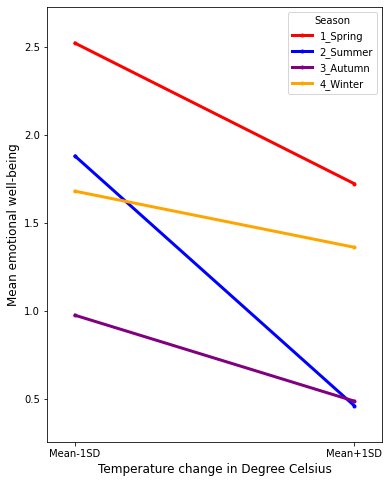

In [439]:
fig, ax = plt.subplots(figsize=(6, 8))
fig = interaction_plot(emo_weather_join5['TAVE_DIFF_cat'], emo_weather_join5['Season'], emo_weather_join5['emotional_well_being'],
                     ax=ax,linewidth=3,colors=["red", "blue",'purple','orange'])
ax.set_xticklabels(['Mean-1SD','Mean+1SD'])
ax.set_xlabel('Temperature change in Degree Celsius',fontsize=12)
ax.set_ylabel('Mean emotional well-being',fontsize=12)
fig.savefig("output/interaction_plot_season_summer.png",dpi=400,bbox_inches='tight')

## check inter-rater agreement

In [1281]:
data= pd.read_excel('pro_environmental_validation.xlsx')

In [1282]:
from sklearn.metrics import cohen_kappa_score,confusion_matrix

In [1288]:
data['Coded_chico'].value_counts()

1    189
0     11
Name: Coded_chico, dtype: int64

In [1286]:
data['Coded_yy'].value_counts()

1    196
0      4
Name: Coded_yy, dtype: int64

In [1279]:
confusion_matrix(data['Coded_chico'], data['Coded_yy'])

array([[  4,   9],
       [  0, 187]])

## check stationary

In [1503]:
emo_weather_join4 = emo_weather_join4.sort_values(by=['publish_time'])

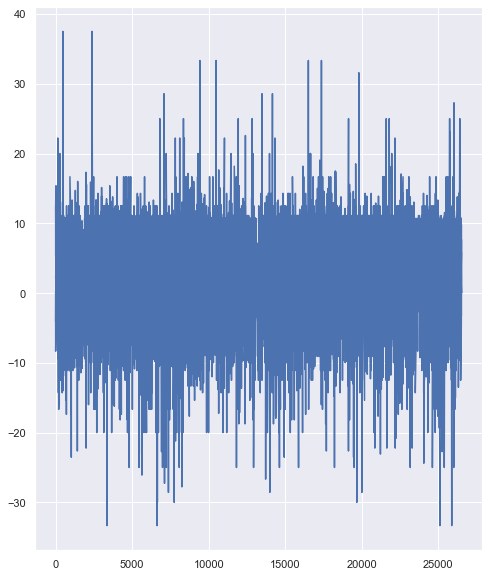

In [1505]:
plt.plot(emo_weather_join4['emotional_tone'])

In [1501]:
from statsmodels.tsa.stattools import adfuller

In [1506]:
adfuller(emo_weather_join4['emotional_tone'],autolag='AIC', regression='ct')

(-16.821269346060618,
 0.0,
 42,
 24113,
 {'1%': -3.959145493683069,
  '5%': -3.4106720916026068,
  '10%': -3.127157235218088},
 152641.24469563668)

## correlations of number of posts and population in million

In [1491]:
data = pd.read_excel('China Yearbook 2022 copy.xlsx',sheet_name='Sheet5')

In [1492]:
data

,ip,IP,人口数,Population (Million),Post count
0,广东,Guangdong,134340,134.340,3062
1,山东,Shandong,107712,107.712,1600
2,河南,Henan,104679,104.679,1165
3,江苏,Jiangsu,90085,90.085,2012
4,四川,Sichuan,88670,88.670,1384
5,河北,Hebei,78885,78.885,1138
6,湖南,Hunan,70141,70.141,842
7,浙江,Zhejiang,69273,69.273,1612
8,安徽,Anhui,64744,64.744,740
9,湖北,Hubei,61748,61.748,1066


In [1493]:
stats.pearsonr(data['Population (Million)'], data['Post count'])

(0.7107511276011833, 7.4489497544831355e-06)

In [1494]:
removed_list = ['重庆','北京','上海','天津']

In [1495]:
data_drop = data[~data['ip'].isin(removed_list)].copy()

In [1496]:
data_drop

,ip,IP,人口数,Population (Million),Post count
0,广东,Guangdong,134340,134.340,3062
1,山东,Shandong,107712,107.712,1600
2,河南,Henan,104679,104.679,1165
3,江苏,Jiangsu,90085,90.085,2012
4,四川,Sichuan,88670,88.670,1384
5,河北,Hebei,78885,78.885,1138
6,湖南,Hunan,70141,70.141,842
7,浙江,Zhejiang,69273,69.273,1612
8,安徽,Anhui,64744,64.744,740
9,湖北,Hubei,61748,61.748,1066


In [1498]:
stats.pearsonr(data_drop['Population (Million)'], data_drop['Post count'])

(0.8997022619630975, 1.7399020610689855e-10)